# Relatório EP02 - MAC0209

** Grupo Rajada ** <br>
Kaique Komata ---- NUSP: 10297741      <br>
Lucas Civile  -------- NUSP: 7083142   <br>
Ricardo Kojo  ------- NUSP: 10295429   <br>
Victor Hugo   -------- NUSP: 10297720  <br>
Yurick Honda  ------ NUSP: 10258984

## Introdução

<p style='text-align: justify;'>Para o segundo exercício programa houve a execução e análise de três experimentos diferentes visando o estudo de movimentos bidimensionais. Assim como no primeiro exercício programa, foi feita a coleta de dados dos experimentos para uma simulação dos fenômenos físicos e possível comparação de dados teóricos com dados experimentais. <br></p>
<p style='text-align: justify;'>A descida na rampa, apesar de um fenômeno muito presente no nosso cotidiano, é capaz de abranger diversos estudos, principalmente em relação à influência da inclinação da rampa no movimento de descida da rampa.<br></p>
<p style='text-align: justify;'>O movimento circular uniforme possui uma base teórica que por certas vezes, não se torna tão intuitiva, gerando confusão, seja por erros de notação ou falta de conhecimentos teóricos, porém a simplicidade do movimento auxilia em seu estudo. <br></p>
<p style='text-align: justify;'>O lançamento de projétil é um movimento parte vertical e parte horizontal que depende do ângulo em relação a um referencial, da força aplicada no lançamento e da força da gravidade. É um fenômeno que pode ser reproduzido facilmente mas que gera muitos estudos.<br></p>

## <i>Physics ToolBox Sensor</i>

<p style='text-align: justify;'>Assim como requisito para a execução do experimento e melhor análise dos dados experimentais, foi utilizada a ferramenta <i>Physics ToolBox Sensor</i>. Para cada experimento, fez-se uso do sensor que mais correspondia ao movimento descrito no experimento:<br></p>
* Descida na rampa: acelerômetro
* Movimento circular uniforme: giroscópio
* Lançamento de projétil: acelerômetro

## Descida na rampa

### Procedimento experimental

<p style='text-align: justify;'>O experimento foi realizado em uma das rampas da Biblioteca Brasiliana Guita e José Mindlin, onde foi utilizada 15 metros de extensão da mesma. A rampa foi seccionada a cada 5 metros, assim houve marcas nas posições de 5, 10 e 15 metros.<br></p>
<p style='text-align: justify;'>O corpo que realizou a descida da rampa foi um carrinho, como aqueles de controle remoto, com um celular em cima dele, colado com fita adesiva.<br></p>
<p style='text-align: justify;'>Assim, durante a execução do experimento, 3 pessoas ficaram posicionadas nas marcas, como os sensores, e marcaram os tempos correspondentes a cada descida na rampa.<br></p>

### Algoritmos de análises e auxiliares

Definindo variáveis auxiliares e importanto bibliotecas necessárias

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sin, radians

dataset = pd.read_csv('./Experimental Data/InclinedPlane.csv')

s = [0, 5, 10, 15]
time_plot = [i for i in range(20)]

G = 9.8
theta = radians(3)
cheat = [0]

Funções auxiliares que de fato representam a modelagem do movimento

In [6]:
# velocity
def vel(ds, dt):
    return G*sin(theta)*dt

# acceleration
def ac(theta):
    return G*sin(theta)

def sT (theta, t):
    return (G*sin(theta)*((t^2)/2))

# receive a list of strings and replace ',' by '.'
# avoids problems related to unit differences
def format_to_float(arr):
    return [s.replace(',', '.') for s in arr]

In [7]:
# calculates average velocity and acceleration, 
# print it to StdOut and plot graphs for Uniformly Accelerated Motion
def calc_plot(dataset, coord_x, coord_y, plot_color):
    subdataset = format_to_float(
        dataset.iloc[coord_x, coord_y[0]:coord_y[1]].values)
    timeline = [float(i) for i in subdataset]
    delta_t = np.sum(timeline)
    velocity = vel(s, delta_t)
    acceleration = ac(theta)
    print(("Aceleration: %s m/s^2") % (acceleration))
    
    cheat[0] = acceleration

    Y = [10, 20, 30]
    Y_2 = [5, 10, 15, 20, 25, 30]
    X = timeline
    for index, value in enumerate(X):
        if (index == 0):
            continue
        else:
            X[index] = X[index-1] + value
    try:
        plt.plot(X, Y, '.', color=plot_color)
    except ValueError:
        plt.plot(X, Y_2, '.', color=plot_color)

    positions_plot = [sUAM(s[0], i, acceleration) for i in range(20)]
    plt.plot(time_plot, positions_plot, color=plot_color)
    
def plot_vel(xlabel="Tempo (s)", ylabel="Velocidade (m/s)"):
    velocity_plot = [cheat[0] * t for t in range(20)]
    plt.plot(time_plot, velocity_plot, color='purple')
    plt.title("Velocidade")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [8]:
def setup_and_save_plot(title, xlabel="Tempo (s)", ylabel="Espaço (m)"):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    # Uncomment line below to save file
    # plt.savefig(filename)
    plt.clf()

Aceleration: 0.5128923711808496 m/s^2


NameError: name 'sUAM' is not defined

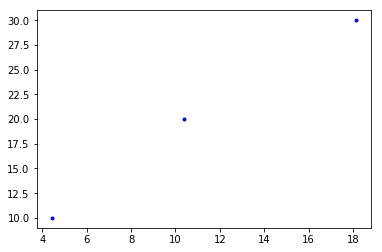

In [9]:
# Uniformly Accelerated Motion
# for index in enumerate(namesMUV):
calc_plot(dataset, 3, [1, 4], 'blue')
setup_and_save_plot("Epaço")
plot_vel()

### Dados

<p style='text-align: justify;'>Os dados coletados durante a execução do experimento apresentam-se como segue abaixo. As cinco descidas realizadas estão marcadas pelo número. Como foram feitas três marcações, então há as faixas de deslocamento: 0m-5m, 5m-10 e 10m-15m.<br></p>
<p style='text-align: justify;'>Vale ressaltar, que, na tabela, os tempos são dados em segundos.<br></p>

|                  |      |      |      | 
|------------------|------|------|------| 
|              Descida na Rampa         | 
|                  | 5m   | 10m  | 15m  | 
| Descida 1        | 4.36 | 5.98 | 7.86 | 
| Descida 2        | 4.24 | 6.13 | 7.95 | 
| Descida 3        | 4.43 | 5.97 | 7.74 | 
| Descida 4        | 4.29 | 6.22 | 8.05 | 
| Descida 5        | 4.3  | 6.32 | 7.92 | 

### Análise

### Interpretação

<p style='text-align: justify;'>Durante a descida de um corpo na rampa, há forças que podem ser divididas em duas componentes: horizontal e vertical. O grande ponto nesse tipo de movimento é a diferença de direção entre a força peso e a força normal atuando sobre o corpo, o que levará a diferenças vetoriais nas acelerações que descrevem tais forças.<br></p>
<img align="center" src="RelatorioImages/plano-inclinado.GIF" width="450" height="450">
<p style='text-align: justify;'>A análise feita para tal movimento é descrita pela imagem acima. Os eixos x e y não são estabelecidos como normalmente, pois para facilitar os cálculos, o eixo x é definido paralelo ao plano da rampa e o eixo y definido como perpendicular ao plano da mesma.<br></p>
<p style='text-align: justify;'>Assim, em y, tem-se que:
<br>
$$F_{ry} = N - P_{y}$$
<br>
Como na descida da rampa não há deslocamento do corpo na direção estabelecida como eixo y. Pode-se afirmar que a força resultante do corpo em y, $F_{ry}$, é igual a zero, assim tem-se que:
<br>
$$0 = N - P_{y} \Rightarrow N = P \Rightarrow N = m.g.cos\theta$$
</p>
<p style='text-align: justify;'>Da mesma forma, faz-se a análise no eixo x, pela imagem:
<br>
$$F_{rx} = P_{x}$$
<br>
Basicamente, a força resultante do corpo na direção do eixo x, $F_{rx}$, corresponde apenas à componente da força peso no eixo x. Porém, como há movimento nessa direção, então não pode-se afirmar que a força resultante na direção x é zero:
<br>
$$F_{rx} = P_{x} \Rightarrow F_{rx} = P.sen\theta \Rightarrow F_{rx} = m.g.sen\theta$$
<br>
$$m.a = m.g.sen\theta \Rightarrow a = g.sen\theta$$
Dessa forma, torna-se claro que a aceleração é constante no tempo, ou seja, sua definição independe no tempo na descida da rampa. Por meio, da aceleração encontrada acima, é possível encontrar a velocidade, bem como a posição instantânea do corpo durante o movimento:
$$v(t) = \int a.dt = \int g.sen\theta.dt = g.sen\theta\int 1.dt = g.sen\theta.t + c$$
$$x(t) = \int g.sen\theta.t.dt = g.sen\theta\int t.dt = g.sen\theta.\frac{t^2}{2} + c$$
Com as equações de velocidade e posição instantânea e sabendo a aceleração, então pode-se aplicar o método de Euler e Euler-Cromer para simular o movimento a partir dos dados coletados.
</p>

## Movimento circular uniforme (MCU)

### Procedimento experimental

<p style='text-align: justify;'>A realização do experimento se deu próximo à Praça do Relógio. O primeiro passo foi fixar o centro da circunferência, então por meio de um pedaço de barbante de cinco metros, marcar as posições de 90, 180, 270 e 360 graus da circunferência de dez metros de diâmetro. Dessa forma, tornou-se simples estabelecer a posição de cada sensor para a medida do tempo.<br></p>
<p style='text-align: justify;'>Assim, para cada execução do experimento, uma pessoa, realizando a função de ponto fixo, segurava uma ponta do barbante, e enquanto isso, outra pessoa caminhava pela circunferência passando pelos pontos marcados no chão, como descrito anteriormente. Assim, duas pessoas ficavam responsáveis pela coleta dos tempos, cada uma marcando todos os sensores.<br></p>

### Algoritmos de análises e auxiliares

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sin, radians

dataset = pd.read_csv('./Experimental Data/UniformCircularMotion.csv')

phi = [radians(90), radians(180), radians(270), radians(360)]
delta_phi = radians(360)
time_plot = [i for i in range(20)]

In [48]:
# velocity
def omega(dp, dt):
    return dp/dt

# acceleration
def ac(do, dt):
    return do/dt

# phi(t), for Uniform Motion
def phiT(phi_0, t, av):
    return t*av

# receive a list of strings and replace ',' by '.'
# avoids problems related to unit differences
def format_to_float(arr):
    return [s.replace(',', '.') for s in arr]

In [55]:
# calculates average velocity, print it to StdOut and plot graphs for Uniform Motion
def calc_vel_and_plot(dataset, coord_x, coord_y, plot_color):
    subdataset = dataset.iloc[coord_x, coord_y[0]:coord_y[1]]
    timeline = [float(i) for i in subdataset]
    delta_t = np.sum(timeline)
    ang_velocity = vel(delta_phi, delta_t)
    print(("Angular Velocity: %s rad/s") % (ang_velocity))

    Y = phi
    X = timeline
    
    for index, value in enumerate(X):
        if (index == 0):
            continue
        else:
            X[index] = X[index-1] + value
    
    plt.plot(X, Y, '.', color=plot_color)

    positions_plot = [phiT(s[0], i, ang_velocity) for i in range(20)] # s[0] comes from constants 
    plt.plot(time_plot, positions_plot, color = plot_color)

In [56]:
def setup_and_save_plot(title, xlabel="Tempo (s)", ylabel="Espaço (m)"):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    # Uncomment line below to save file
    # plt.savefig(filename)
    plt.clf()

Angular Velocity: 28.778390946957476 rad/s


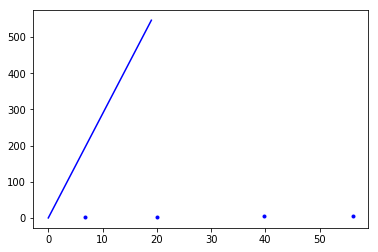

In [57]:
calc_vel_and_plot(dataset, (2), [2, 6], 'blue')

### Dados

<p style='text-align: justify;'>Os dados coletados durante a execução do experimento apresentam-se como segue abaixo. Os tempos foram divididos pelos sensores de marcação em 90, 180, 270 e 360 graus. Cada coleta de dados foi dividida pela pessoa que realizou a caminhada.<br></p>
<p style='text-align: justify;'>Como houve dois sensores simultâneos,então a tabela divide cada um dos sensores com os tempos em segundos.<br></p>

|                                   |         |          |           |           |           | 
|-----------------------------------|---------|----------|-----------|-----------|-----------| 
| Movimento Circular Uniforme (MCU) |         | 90 graus | 180 graus | 270 graus | 360 graus | 
| Yurick                            | Crono 1 | 4.83     | 9.6       | 14.81     | 20.57     | 
|                                   | Crono 2 | 4.69     | 9.6       | 14.8      | 20.47     | 
| Kaique                            | Crono 1 | 6.73     | 13.22     | 19.87     | 16.29     | 
|                                   | Crono 2 | 6.96     | 13.44     | 19.67     | 26.31     | 
| Lucas                             | Crono 1 | 5.72     | 11.89     | 17.59     | 23.92     | 
|                                   | Crono 2 | 5.88     | 11.52     | 17.40     | 23.71     | 
| Kojo                              | Crono 1 | 5.84     | 11.53     | 17.49     | 23.50     | 
|                                   | Crono 2 | 5.93     | 11.70     | 17.40     | 25.42     | 
| Victor                            | Crono 1 | 6.02     | 12.00     | 18.02     | 24.24     | 
|                                   | Crono 2 | 5.75     | 12.02     | 17.88     | 24.50     | 


### Análise

### Interpretação

<p style='text-align: justify;'>Antes de dar início à discussão sobre esse tipo de movimento, é preciso estabelecer alguns conceitos importantes. Para isso, novamente, utiliza-se uma imagem para tornar os conceitos mais legíveis.<br></p>
<img align="center" src="Images/MCU-Angle.GIF" width="450" height="450">
* Espaço Angular$(\phi)$: espaço do arco percorrido pelo corpo, partindo da origem (O).
* Deslocamento Angular $(\Delta \phi)$: variação angular correspondente ao movimento do corpo, partindo da origem (O).
* Velocidade Angular $(\omega)$: variação angular a cada certa variação no tempo, portanto possui a mesma ideia de velocidade em movimentos unidimensionais, porém a grandeza analisado corresponde à angulação.
* Período $(T)$: tempo utilizado para se completar uma volta inteira na circunferência.
* Aceleração Centrípeta $(a_{cp})$: aceleração, de módulo constante, responsável pela mudança de direção do vetor velocidade. Seu vetor possui direção e sentido apontando para o centro da circunferência, sendo o responsável pela trajetória circular e uniforme (módulo constante).
<p style='text-align: justify;'>Por conhecimentos físicos básicos, sabe-se que $a_{cp} = \frac{v^2}{R} = \frac{(\frac{2.\pi.R}{T})^2}{R} = \frac{(2.\pi)^2 . R}{T^2}$. Como todos os valores que compõem $a_{cp}$ são constantes, então conclui-se que a aceleração centrípeta possui valor constante. A partir dela, é possível calcular a velocidade angular e posição angular instantânea: <br></p>
$$\omega (t) = \int a_{cp}.dt = \int \frac{(2.\pi)^2 . R}{T^2} .dt = \frac{(2.\pi)^2 . R}{T^2}.\int 1.dt = \frac{(2.\pi)^2 . R}{T^2}.t + c$$
$$\phi (t) = \int \frac{(2.\pi)^2 . R}{T^2}.t.dt = \frac{(2.\pi)^2 . R}{T^2}.\int t.dt = \frac{(2.\pi)^2 . R}{T^2}.\frac{t^2}{2} + c$$

## Lançamento de Projétil

### Procedimento Experimental

<p style='text-align: justify;'>A realização do experimento se deu atrás do bloco A do IME. Primeiro foi providenciado uma espécie de estojo onde o celular com o acelerômetro seria fixado para que pudesse ser arremessado com mais segurança. Foi fixado um ponto onde um integrante se posicionaria para arremessar o estojo. Com uma trena, foram medidos 5 metros da posição do primeiro integrante e marcado o local onde o segundo integrante se posicionaria para receber o estojo. <br></p>
<p style='text-align: justify;'>Assim, para cada execução do experimento, um terceiro integrante observava o lançamento e marcava os tempos de arremesso e pouso do estojo.<br></p>

### Algoritmos de análises e auxiliares

### Dados

<p style='text-align: justify;'>Os dados coletados durante a execução do experimento apresentam-se como segue abaixo.<br></p>
<p style='text-align: justify;'>Como todos os tempos de arremesso são considerados como o instante 0, a tabela contém apenas os tempos de pouso do projétil em segundos.<br></p>

|                        |                  |
|------------------------|------------------|
| Lançamento do projétil |  Tempo de pouso  |
| Arremesso 1            |        1.19      | 
| Arremesso 2            |        1.07      |
| Arremesso 3            |        1.16      | 
| Arremesso 4            |        1.04      | 
| Arremesso 5            |        1.05      | 

### Análise

### Intepretação

<p style='text-align: justify;'>Para estudar o movimento de um projétil lançado, é preciso utilizar o princípio da decomposição do movimento, considerando a resultante entre o movimento vertical <b>y</b> e o movimento horizontal <b>x</b>.<br></p>
<img align="center" src="Images/lancamento-projetil.GIF" width="450" height="450">
* Velocidade inicial $(\vec{v}_0)$;
* Velocidade vertical inicial $(\vec{v}_{0y})$;
* Velocidade horizontal inicial $(\vec{v}_{0x})$;
* Ângulo em relação ao referencial $(\theta)$;
* Posição inicial $(S_0)$ e posição final $(S)$;
* Altura máxima atingida pelo objeto $(H)$;
* Aceleração da gravidade $(g)$.
<p style='text-align: justify;'>Por conhecimentos de física, sabemos que a velocidade inicial pode ser expressada pela soma das componentes horizontal e vertical: $\vec{v}_0 = \vec{v}_{0x}i + \vec{v}_{0y}j$. Além disso, sabemos que a velocidade instântanea é dada pela soma vetorial das velocidades: $v = \sqrt{{\vec{v}_x}^2 + {\vec{v}_y}^2}$.<br>
Sabendo do ângulo inicial $\theta$, podemos achar as componentes horizontal e vertical iniciais: $\vec{v}_{0x} = \vec{v}_0 . \cos(\theta)$ e $\vec{v}_{0y} = \vec{v}_0 . \sin(\theta)$.
<p style='text-align: justify;'>Na direção vertical, o projétil realiza um movimento uniformemente variado com a aceleração da gravidade $a_y = -g$. Assim, a aceleração no eixo vertical pode ser integrada para se encontrar a velocidade no eixo vertical em qualquer instante $t$:<br>
<center>$\vec{v}_y = \vec{v}_0 . \sin(\theta) - gt$</center>
Ainda na direção vertical, podemos calcular a posição do projétil no eixo y em qualquer instante $t$:<br>
<center>$y = \vec{v}_0 . t . \sin(\theta) - \frac{1}{2} . gt^2$</center>
Com essas equações, é possível calcular a altura máxima atingida pelo projétil e o seu tempo de vôo:<br>
<center>$H = \frac{{\vec{v}_0}^2 . \sin^2(\theta)}{2g}$ e $t = \frac{2 . \vec{v}_0 . \sin(\theta)}{g}$</center></p>
<p style='text-align: justify;'>Na direção horizontal, o projétil realiza um movimento retilíneo uniforme, portanto sua aceleração $a_x = 0$. Assim, a aceleração no eixo horizontal pode ser integrada para se encontrar a velocidade no eixo horizontal em qualquer instante $t$:<br>
<center>$\vec{v}_x = \vec{v}_0 . \cos(\theta)$</center>
Ainda na direção horizontal, podemos calcular a posição do projétil no eixo x em qualquer instante $t$:<br>
<center>$x = \vec{v}_0 . t . \cos(\theta)$</center>
Com essas equações, é possível calcular o alcance ou distância horizontal máximo atingido pelo projétil:<br>
<center>$S-S_0 = d = \frac{{\vec{v}_0}^2 . \sin(2\theta)}{g}$</center></p>

## Conclusão

## Log

* Realização dos experimentos: 2 dias
* Criação dos scripts: 3 dias
* Elaboração do relatório: 
* Edição do vídeo: 

## Contribuição dos autores

<p style='text-align: justify;'>Victor Hugo e Ricardo Kojo escreveram e implementaram os scripts para análise e desenho dos gráficos. Todos os autores participaram nos experimentos e nas coletas de dados. Lucas Civile criou e editou o vídeo dos experimentos. Kaique Komata e Yurick Honda analisaram os dados obtidos e excreveram o texto desse manuscrito. Todos os autores leram, revisaram e aprovaram esse manuscrito.</p>

## Vídeo